In [42]:
import geopandas as gp
costanera_buildings = gp.read_file('../shapefiles/buildings/Buildings_Costanera_activity.shp')

,Destino,Activity,geometry
0,HABITACIONAL,1000,"POLYGON ((673120.714 5921483.603, 673109.209 5..."
1,HABITACIONAL,1000,"POLYGON ((673051.081 5921458.906, 673045.231 5..."
2,HABITACIONAL,1000,"POLYGON ((673084.387 5921474.259, 673087.412 5..."
3,HABITACIONAL,1000,"POLYGON ((673155.770 5921468.684, 673157.641 5..."
4,HABITACIONAL,1000,"POLYGON ((673126.724 5921471.405, 673116.800 5..."


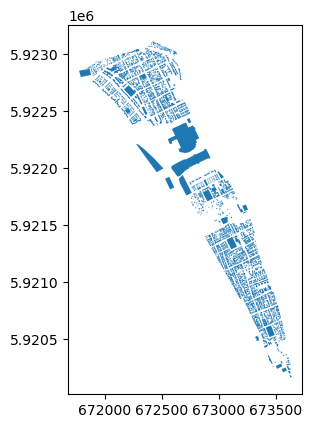

In [43]:
costanera_buildings.plot()
costanera_buildings.head()

In [44]:
costanera_buildings['Usage'] = costanera_buildings.apply(lambda row: 'R' if row['Activity'] < 2000 else 'O', axis=1)    
costanera_buildings.head()

,Destino,Activity,geometry,Usage
0,HABITACIONAL,1000,"POLYGON ((673120.714 5921483.603, 673109.209 5...",R
1,HABITACIONAL,1000,"POLYGON ((673051.081 5921458.906, 673045.231 5...",R
2,HABITACIONAL,1000,"POLYGON ((673084.387 5921474.259, 673087.412 5...",R
3,HABITACIONAL,1000,"POLYGON ((673155.770 5921468.684, 673157.641 5...",R
4,HABITACIONAL,1000,"POLYGON ((673126.724 5921471.405, 673116.800 5...",R


In [45]:
from shapely.geometry import shape
costanera_buildings['Area'] = costanera_buildings.apply(lambda row: shape(row['geometry']).area, axis=1)  
costanera_buildings.head()  

,Destino,Activity,geometry,Usage,Area
0,HABITACIONAL,1000,"POLYGON ((673120.714 5921483.603, 673109.209 5...",R,90.146762
1,HABITACIONAL,1000,"POLYGON ((673051.081 5921458.906, 673045.231 5...",R,195.006940
2,HABITACIONAL,1000,"POLYGON ((673084.387 5921474.259, 673087.412 5...",R,101.624005
3,HABITACIONAL,1000,"POLYGON ((673155.770 5921468.684, 673157.641 5...",R,250.890106
4,HABITACIONAL,1000,"POLYGON ((673126.724 5921471.405, 673116.800 5...",R,149.251804


In [46]:
from sklearn.cluster import KMeans

area_array = costanera_buildings.Area.to_numpy().reshape(-1,1)

general_kmeans = KMeans(n_clusters=3, random_state=43, n_init='auto')
general_kmeans.fit(area_array)

residential_df = costanera_buildings[costanera_buildings['Usage'] == 'R']
residential_area_array = residential_df.Area.to_numpy().reshape(-1,1)
residential_kmeans = KMeans(n_clusters=3, random_state=43, n_init='auto')
residential_kmeans.fit(residential_area_array)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
In

KMeans(n_clusters=3, n_init='auto', random_state=43)

In [47]:
print(general_kmeans.cluster_centers_)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Inte

In [48]:
print(residential_kmeans.cluster_centers_)

[[ 65.68167553]
 [217.56306055]
 [673.22684631]]


In [49]:
# Looking at the centroids:
# Cluster 0 -> Small
# Cluster 1 -> Large
# Cluster 2 -> Medium
# For residences:
# Cluster 0 -> Small
# Cluster 1 -> Medium
# Cluster 2 -> Large

import numpy as np

def get_scale(row):
    if row['Usage'] == 'O':
        cluster = general_kmeans.predict(np.array(row['Area']).reshape(-1, 1))
        if cluster == 0:
            return 'S'
        elif cluster == 2:
            return 'M'
        else:
            return 'L'
    elif row['Usage'] == 'R':    
        cluster = residential_kmeans.predict(np.array(row['Area']).reshape(-1, 1))
        if cluster == 0:
            return 'S'
        elif cluster == 1:
            return 'M'
        else:
            return 'L'

costanera_buildings['Scale'] = costanera_buildings.apply(lambda row: get_scale(row), axis=1)  
costanera_buildings.head()

,Destino,Activity,geometry,Usage,Area,Scale
0,HABITACIONAL,1000,"POLYGON ((673120.714 5921483.603, 673109.209 5...",R,90.146762,S
1,HABITACIONAL,1000,"POLYGON ((673051.081 5921458.906, 673045.231 5...",R,195.006940,M
2,HABITACIONAL,1000,"POLYGON ((673084.387 5921474.259, 673087.412 5...",R,101.624005,S
3,HABITACIONAL,1000,"POLYGON ((673155.770 5921468.684, 673157.641 5...",R,250.890106,M
4,HABITACIONAL,1000,"POLYGON ((673126.724 5921471.405, 673116.800 5...",R,149.251804,M


In [50]:
#TODO: improve this activity_code to Category transform
def building_type(row):
    activity_code = row['Activity']
    if activity_code < 2000:
        return 'R'
    elif activity_code == 4110:
        return 'Uni'
    elif activity_code == 2100:
        return 'Shopping'
    elif activity_code == 2200:
        return 'Restaurant'
    elif activity_code == 7220:
        return 'Night'
    elif activity_code == 7240:
        return 'Park'
    elif activity_code == 4100:
        return 'HS'
    elif activity_code >= 6000 and activity_code < 7000:
        return 'Cultural'
    else:
        return 'O'

costanera_buildings['Category'] = costanera_buildings.apply(lambda row: building_type(row), axis=1)  
costanera_buildings.head()

,Destino,Activity,geometry,Usage,Area,Scale,Category
0,HABITACIONAL,1000,"POLYGON ((673120.714 5921483.603, 673109.209 5...",R,90.146762,S,R
1,HABITACIONAL,1000,"POLYGON ((673051.081 5921458.906, 673045.231 5...",R,195.006940,M,R
2,HABITACIONAL,1000,"POLYGON ((673084.387 5921474.259, 673087.412 5...",R,101.624005,S,R
3,HABITACIONAL,1000,"POLYGON ((673155.770 5921468.684, 673157.641 5...",R,250.890106,M,R
4,HABITACIONAL,1000,"POLYGON ((673126.724 5921471.405, 673116.800 5...",R,149.251804,M,R


In [51]:
costanera_buildings.to_file('../includes/city/costanera/Buildings.shp')  